<a href="https://colab.research.google.com/github/YusufAlperGulden/Yapay-Zeka-Deep-Learning/blob/main/Neural_Network_For_Handwritten_Digits_Classification_%7C_Deep_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [74]:
x_train[0].shape

(28, 28)

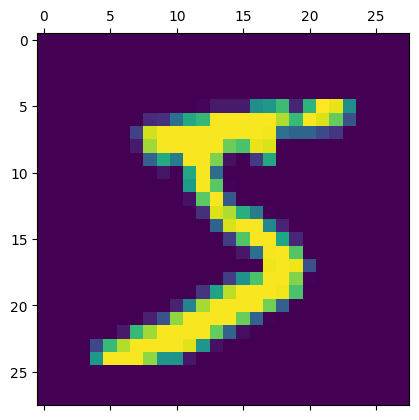

In [75]:
plt.matshow(x_train[0])

In [76]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [77]:
x_train=x_train/255
x_test=x_test/255

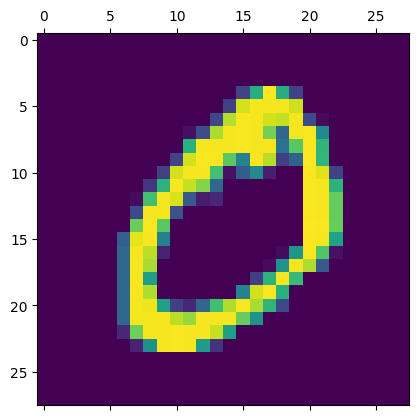

In [78]:
plt.matshow(x_train[1])

In [79]:
x_train.shape #60000 images that has 28x28 pixels size

(60000, 28, 28)

In [80]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [81]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [82]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8143 - loss: 0.7214
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9132 - loss: 0.3150
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9207 - loss: 0.2882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.2747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9246 - loss: 0.2677


In [88]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3022


[0.26726970076560974, 0.9248999953269958]

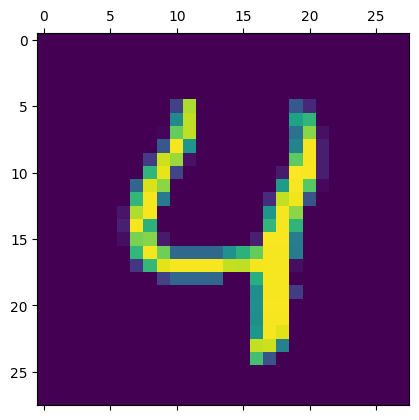

In [89]:
plt.matshow(x_test[4]) #Displaythe first image in your test dataset.

In [90]:
y_predicted=model.predict(x_test_flatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.1351655e-01, 4.4464706e-03, 9.9939626e-01, 4.1763359e-01,
       6.1572331e-10, 8.7441432e-01, 8.9390922e-01, 1.2830356e-12,
       1.4783238e-01, 2.7324183e-09], dtype=float32)

In [91]:
python_int = int(np.argmax(y_predicted[1]))
print(python_int)

2


In [92]:
y_test[:5]#Show the labels for the first 5 images in the "test" set.

array([7, 2, 1, 0, 4], dtype=uint8)

In [93]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]